In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib notebook
import sklearn
from sklearn import preprocessing # utilisé pour l'encodage de 'species'

# 1. Chargement des données

In [2]:
#import train and test CSV files
train = pd.read_csv("data/train-data.txt", sep=" ")

In [3]:
print(train.shape) # return number of (rows, columns)
print(train.columns[0:5])

(417, 1301)
Index(['species', 'feature_1', 'feature_2', 'feature_3', 'feature_4'], dtype='object')


Il y a 1301 caractères étudiés pour 417 indvidus. La première colonne "species" constitue le caractère à inférer.

Observons si il y a des NAN dans le fichier :

In [4]:
train_no_na = train.dropna(axis="columns")
print(train_no_na.shape)

(417, 1276)


Nous faisons le choix de ne conserver que les données dont les caractères sont tous représentés parmis les individus.

Nous procédons maintenant à l'encodage de la colonne species.

In [5]:
feat_cols = train_no_na.columns[1:]
df = train_no_na.copy()
le = preprocessing.LabelEncoder()
le.fit(train_no_na['species'])
print(list(le.classes_))
print(len(list(le.classes_)))
df['species'] = le.transform(train_no_na['species'])
df.head()

['AUG.AEX', 'AUG.HSS', 'BUT.BIK', 'BUT.DNW', 'BUT.TRH', 'BUT.YZE', 'EMD.FZO', 'EMD.WXC', 'JNH.FLH', 'JNH.ZIJ', 'NYV.VCE', 'NYV.XSY', 'QBG.CRP', 'QBG.KGI', 'QWP.DRH', 'QWP.LRO', 'RTO.JFR', 'RTO.TQH', 'VVJ.KSF', 'VVJ.KWJ']
20


,species,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_8,feature_9,feature_10,...,feature_1291,feature_1292,feature_1293,feature_1294,feature_1295,feature_1296,feature_1297,feature_1298,feature_1299,feature_1300
0,17,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,18,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,18,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,18,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,18,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0


# 2. Analyse exploratoire
## 2.1. Réduction dimensionnelle par PCA

In [6]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]


print('Explained variation per principal component:'+format(pca.explained_variance_ratio_))
print(sum(pca.explained_variance_ratio_))

Explained variation per principal component:[0.08233712 0.04394923 0.03971913]
0.16600548505516832


In [7]:
print(pca_result.shape)

(417, 3)


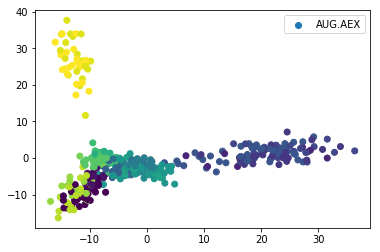

In [8]:
plt.scatter(x=df['pca-one'], y=df['pca-two'], c=df['species'], label=le.classes_)
plt.legend(le.classes_)

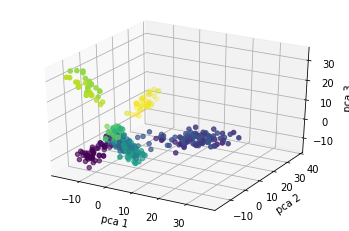

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['pca-one'], df['pca-two'], df['pca-three'], c=df['species'], marker='o', label=le.classes_)

ax.set_xlabel('pca 1')
ax.set_ylabel('pca 2')
ax.set_zlabel('pca 3')

#plt.legend(le.classes_)

plt.show()


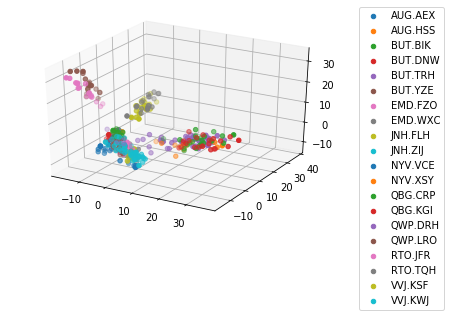

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(1,len(le.classes_)+1):
    ax.scatter(df[df['species']==i]['pca-one'].values,
                df[df['species']==i]['pca-two'].values,
                df[df['species']==i]['pca-three'].values,
                marker='o', label=le.classes_[i-1])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Approche T-SNE

In [15]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[:,feat_cols].values)


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 417 samples in 0.029s...
[t-SNE] Computed neighbors for 417 samples in 0.657s...
[t-SNE] Computed conditional probabilities for sample 417 / 417
[t-SNE] Mean sigma: 18.497598
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.223122
[t-SNE] KL divergence after 300 iterations: 0.596214
t-SNE done! Time elapsed: 2.37813663482666 seconds


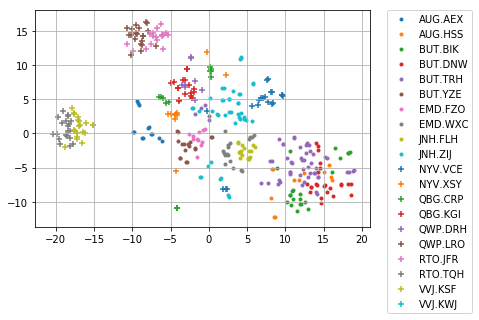

In [37]:
df_tsne = df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(1,len(le.classes_)+1):
    if i < 11:
        marker = '.'
    else:
        marker = '+'
    ax.scatter(df_tsne[df_tsne['species']==i]['x-tsne'].values,
                df_tsne[df_tsne['species']==i]['y-tsne'].values,
                marker=marker, label=le.classes_[i-1])
ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### combinaison des deux

In [32]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Cumulative explained variation for 50 principal components: 0.587523661153173
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 417 samples in 0.001s...
[t-SNE] Computed neighbors for 417 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 417 / 417
[t-SNE] Mean sigma: 10.137083
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.502663
[t-SNE] KL divergence after 300 iterations: 0.459521
t-SNE done! Time elapsed: 1.6191325187683105 seconds


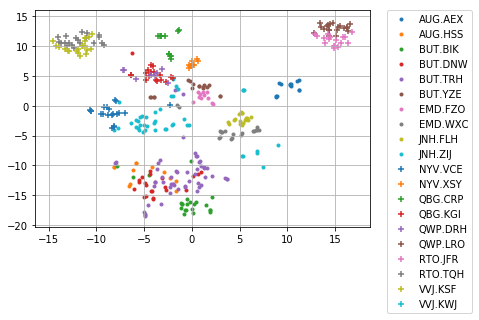

In [36]:
df_tsne = None
df_tsne = df.copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(1,len(le.classes_)+1):
    if i < 11:
        marker = '.'
    else:
        marker = '+'
    ax.scatter(df_tsne[df_tsne['species']==i]['x-tsne-pca'].values,
                df_tsne[df_tsne['species']==i]['y-tsne-pca'].values,
                marker=marker, label=le.classes_[i-1])
          
ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)